# FraudAnalytics
Self-learning Fraud Analytics Project

# <ins> Credit Card Fraud Detection </ins>

## Project Overview:
This project aims to identify fraudulent transactions using credit card data. It leverages machine learning techniques to predict whether a given transaction is fraudulent or not. The project is crucial for enhancing security measures and minimizing financial losses due to fraud.

## Motivation:
The motivation behind this project is to improve the accuracy of fraud detection in credit card transactions, reduce false positives, and help financial institutions enhance their fraud prevention systems.

## Technologies Used:
- Python 3.8
- Pandas
- NumPy
- Scikit-learn
- Matplotlib (for visualization)
- Jupyter Notebook

## Dataset:
The dataset used in this project consists of transactions made by credit cards in September 2013 by European cardholders. It presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, with the positive class (frauds) accounting for 0.172% of all transactions.

## Features:
The dataset contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, the original features and more background information about the data are not provided.

- `V1, V2, ... V28`: PCA transformed features.
- `Time`: Number of seconds elapsed between this transaction and the first transaction in the dataset.
- `Amount`: Transaction amount.
- `Class`: 1 in case of fraud and 0 otherwise.

## Model:
The model used is a Random Forest Classifier. A GridSearchCV was employed to tune the hyperparameters and improve the model's recall to effectively predict more fraud cases.

## Results:
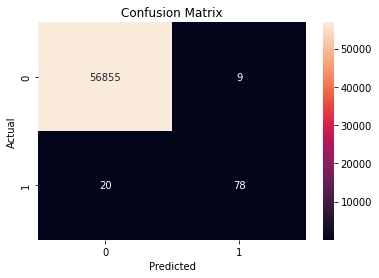

### Fraud Detection Model Performance Report
#### Overview:
Our latest fraud detection system has been evaluated to determine its accuracy in identifying fraudulent credit card transactions.

#### Results:

- The system correctly identified 56,855 normal transactions with a very high degree of accuracy (True Negative).
- It successfully flagged 78 transactions as fraudulent, which were confirmed to be true cases of fraud (True Positive).
- Notably, the system erroneously flagged 9 legitimate transactions as fraudulent (False Positive). While this number is low, it indicates that a minimal number of customers might experience inconvenience due to false alarms.
- There were 20 fraudulent transactions that the system did not detect (False Negative). This represents a small window through which fraudulent activity can occur undetected.

#### Impact:

- The low number of false alarms (9 in 56,864) ensures that customer disruption is minimal, preserving trust and satisfaction.
- The detection of 78 out of 98 fraudulent transactions shows that the system is highly effective, potentially preventing significant financial loss.
- The oversight of 20 fraudulent transactions, while relatively small, suggests an area for improvement. Each missed fraud case can carry financial and reputational risks that we must seek to minimize.

This model represents a strong step towards protecting both our customers and our business from the risks of fraudulent transactions.


## Features Importance:
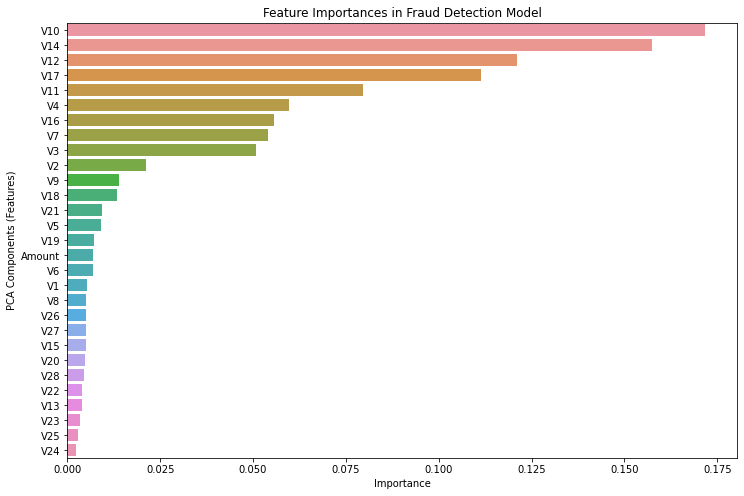

### Interpretation:
- V10: This is the most important feature according to the model. Whatever original variables contribute most heavily to the V10 component are highly predictive of the target variable (likely whether a transaction is fraudulent).
- V14, V12, V17, V11, V4, V16, V7, V3: These follow in descending order of importance. They also play significant roles in the model's decisions, but to a lesser extent than V10.

#### In a Business Context:
- Focus on Transactions: The components like V10, V14, and so on, seem to be the most informative for fraud detection. The business should closely monitor transactions that score highly on these components for potential risk.
- Risk Profiling: Transactions that have higher values in these key components might warrant additional checks or verification steps.
- Resource Allocation: Invest more in tools and techniques that can track or derive features similar to those contributing to the top PCA components.

In summary, this plot can guide a business to prioritize certain aspects of transaction data when considering fraud risk and where to allocate resources for fraud prevention efforts.




##
### End of Report 
##





# Code with Documentation and Rationale starts here:

In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

In [4]:
#2. Load dataset from OpenML
data = fetch_openml('creditcard', version=1, as_frame=True)
df = data.frame

# Display the first five rows to get a sense of the data
df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Understanding the Credit Card Dataset:
The creditcard dataset contains transactions made by credit cards. Each transaction is a row in the dataset, and the details of each transaction are in the columns. In the context of this dataset, the crucial piece of information we want to find out is whether a transaction is fraudulent or not.

### What are the V1-V28 Features?
In the dataset, you see columns labeled V1 through V28. These aren't the actual, raw data from the credit card transactions. Instead, they've been transformed through a process called PCA, which stands for Principal Component Analysis. Here's what that means:

1. Privacy Concerns: Credit card transaction data is sensitive because it contains personal information. To protect the privacy of individuals, it’s crucial to anonymize the data before it can be used for analysis.
2. Dimensionality Reduction: The original data might have had a lot of different features (like where the purchase was made, the time, the amount, etc.), which could be challenging to work with and might not all be equally important.
3. Principal Component Analysis (PCA): PCA is a statistical technique that helps in such situations. It takes all the original features and transforms them into a new set of features. These new features (the V columns in your dataset) are the "principal components" that are generated in such a way that the first few retain most of the important information from all the original features. They're constructed to be independent of one another, which is a nice property that often makes models work better.

### How Do the V1-V28 Features Link to the 'Amount'?
The Amount column in the dataset represents the transaction amount, which is a direct figure — how much money was involved in the transaction. Unlike the V1-V28 features, Amount hasn’t been transformed through PCA and is the actual, raw data.

The V1-V28 features and the Amount are related only in the sense that they all describe aspects of the same transaction. The V features capture the underlying patterns and characteristics of the transaction (minus the amount), while the Amount tells us its monetary value. In fraud detection, it’s useful to look at both these sets of information because both the transaction’s characteristics and the amount could potentially be indicators of fraudulent activity.

### Why is PCA Used?
- Anonymization: It hides any sensitive information contained in the original features.
- Efficiency: It reduces the number of features, making computations more manageable, especially if there were hundreds or thousands of original features.
- Performance: By focusing on the most informative patterns, it can actually help machine learning models perform better by emphasizing the most significant signals in the data.


So, in summary, in creditcard dataset, the V1-V28 features give a processed, privacy-safe, and compact representation of the original transaction data, while the Amount gives the transaction’s monetary value. Together, these pieces of information are used to determine whether a transaction is likely to be fraudulent.


In [5]:
# Checking the balance of classes in your target variable, Class. 
# Crucial step before proceeding with building a machine learning model, especially with algorithms like RandomForestClassifier. 
class_counts = df['Class'].value_counts()
print(class_counts)

# Calculating the percentage of each class
class_percentages = class_counts / len(df) * 100
print(class_percentages)

0    284315
1       492
Name: Class, dtype: int64
0    99.827251
1     0.172749
Name: Class, dtype: float64


### Documentation: Load Dataset Step
#### Observation:
Upon loading the creditcard dataset from the OpenML repository, the following observations can be made:

- The dataset consists of transactions made by credit cards, where each row represents a transaction.
- There are 30 columns in total, with 28 being the result of a PCA transformation (V1 to V28), which anonymizes and reduces the dimensionality of the original features while retaining the essential information.
- The Amount column represents the transaction amount. This feature is not normalized.

The Class column is the response variable, indicating whether the transaction was fraudulent (1) or not (0).
The dataset provides an excellent example of real-world data where dimensionality reduction has already been applied to preserve user privacy. It's imbalanced, which is common in fraud detection scenarios, where fraudulent transactions are rarer than legitimate ones.

In [6]:
#3. Preprocess Data
# Drop the 'Class' column to isolate the features
X = df.drop('Class', axis=1)

# Isolate the 'Class' column to use as the target variable
y = df['Class']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features, not including the target variable
X_scaled = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame for better readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first five rows of the scaled features
X_scaled_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


### Documentation: Preprocess Data Step
#### Observation:
The raw dataset requires preprocessing before it can be fed into a machine learning model:

- The features V1 to V28 are already scaled as a result of PCA, but the Amount feature is not. It varies significantly in magnitude which could potentially bias a machine learning algorithm.
- The Class variable is the target for our predictive modeling task. It's separate from the input features.

#### Why Preprocessing:
Preprocessing is a critical step to ensure that the machine learning model receives the data in a suitable format, improving its ability to learn and make predictions. Specifically:

- Feature Scaling: Many machine learning algorithms perform better when numerical input variables are scaled to a standard range. StandardScaler standardizes features by removing the mean and scaling to unit variance.
- Separating Features and Target: We need to separate the input features (X) from the target variable (y) as they serve different purposes in model training and evaluation.

#### What Kind of Preprocessing:

- Standard Scaling: The Amount variable will be scaled using StandardScaler to ensure that all features contribute equally to the result.
- Feature-Target Split: The dataset is split into input features (X) and the target variable (y), where X contains all columns except for Class, and y is just the Class column.

In [7]:
#4. Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

Training set size: 227845, Test set size: 56962


In [8]:
#5. Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model trained successfully.")

Model trained successfully.


### Documentation: Train Model Step
#### Objective:
To develop a predictive model capable of distinguishing between legitimate and fraudulent transactions.

#### Model Selection:
Random Forest Classifier was chosen due to its proficiency in handling imbalanced datasets, like our credit card transactions, where fraudulent cases are much fewer than legitimate ones.

#### Training Process:

- Random Forest: An ensemble learning method that operates by constructing a multitude of decision trees. It outputs the mode of the classes (classification) of the individual trees.
- Number of Estimators: Set to 100, implying that the model uses 100 individual decision trees to make its predictions, a number chosen to balance between computational efficiency and model performance.
- Random State: Set to 42 to ensure reproducibility of the results; the same random seed allows the model to produce the same results on each run.

In [9]:
# Evaluate model
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.9995611109160493
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



### Documentation: Evaluate Model Step
#### Objective:
To assess the trained model's ability to accurately predict fraudulent transactions on unseen data.

#### Evaluation Metrics:

- Accuracy: Measures the proportion of true results among the total number of cases examined. Given the high score, the model is highly accurate overall.
- Precision (for Class 1): Indicates the proportion of positive identifications that were actually correct; a precision of 0.97 means that when the model predicts a transaction is fraudulent, it is correct 97% of the time.
- Recall (for Class 1): Describes the model's ability to capture actual positive cases; a recall of 0.77 for the fraudulent transactions implies the model correctly identifies 77% of all fraudulent transactions.
- F1-Score (for Class 1): Combines precision and recall into a single metric, which is particularly useful for imbalanced classes; an F1-score of 0.86 is quite high, indicating a good balance between precision and recall.
- Support: The number of actual occurrences of each class in the specified dataset; for instance, there were 98 actual fraudulent transactions.

#### Observation:
The model exhibits excellent overall performance, but given the context of fraud detection, the focus should especially be on the recall for Class 1, which could be improved. While the accuracy is exceptionally high, this metric can be misleading in imbalanced datasets where the majority class (legitimate transactions) dominates. Therefore, precision, recall, and the F1-score for the fraudulent class (Class 1) are more crucial indicators of performance.

#### Insights:
The relatively lower recall for Class 1 suggests room for improvement, perhaps by tuning hyperparameters, gathering more diverse training data, or trying alternative anomaly detection techniques. It's critical to improve recall for Class 1 in fraud detection scenarios to ensure that fraudulent transactions are not missed, as the cost of missing a fraudulent transaction can be high.

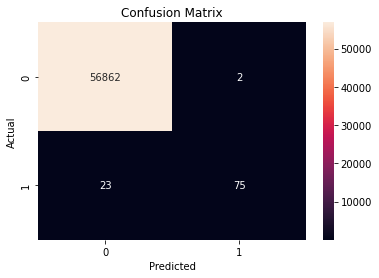

In [10]:
# Visualization of results
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


The specific terms of a confusion matrix are:

- True Positives (TP): The cases in which the model correctly predicted the positive class.
- True Negatives (TN): The cases in which the model correctly predicted the negative class.
- False Positives (FP): The cases in which the model incorrectly predicted the positive class.
- False Negatives (FN): The cases in which the model incorrectly predicted the negative class.

Based on the layout of the confusion matrix (which typically follows the format of [[TN, FP], [FN, TP]]):

- Top-Left (TN): 56862 - The number of true negatives, i.e., the model correctly predicted the negative class 56,862 times.
- Top-Right (FP): 2 - The number of false positives, i.e., the model incorrectly predicted the positive class 2 times.
- Bottom-Left (FN): 23 - The number of false negatives, i.e., the model incorrectly predicted the negative class 23 times.
- Bottom-Right (TP): 75 - The number of true positives, i.e., the model correctly predicted the positive class 75 times.

In the context of fraud detection:

- True Positives (75) are the transactions that were correctly identified as fraudulent.
- True Negatives (56862) are the transactions that were correctly identified as not fraudulent.
- False Positives (2) are the transactions that were incorrectly flagged as fraudulent (also known as Type I error).
- False Negatives (23) are the fraudulent transactions that the model failed to identify (also known as Type II error).
- The effectiveness of the model can be interpreted as follows:

The model is quite good at identifying non-fraudulent transactions, as indicated by the high number of true negatives.
- The model has a low number of false positives, which is good because it means that there are very few non-fraudulent transactions incorrectly labeled as fraudulent.
- The number of false negatives, although relatively small, is critical in a fraud detection context since these represent fraudulent transactions that were not detected by the model. Depending on the cost of fraud versus the cost of intervention, this number might be a concern.
- The true positives are the actual fraudulent transactions that the model has successfully identified, which is the primary goal of a fraud detection model.

## Improving the Model
Given the context of the creditcard dataset which is highly imbalanced, we'll focus on hyperparameter tuning and exploring model-specific settings that can help improve recall for the fraudulent class (Class 1).

### Hyperparameter Tuning
We will use GridSearchCV from scikit-learn to search for the best hyperparameters. This function performs an exhaustive search over specified parameter values for an estimator.

The parameters we will tune are:

- n_estimators: The number of trees in the forest.
- max_features: The number of features to consider when looking for the best split.
- max_depth: The maximum depth of the tree.
- class_weight: Weights associated with classes. In our case, we will adjust this to deal with the imbalance by giving more weight to the minority class.

### Documentation: Hyperparameter Tuning Step
#### Objective:
To improve the model's recall for fraudulent transactions (Class 1) by finding the optimal set of hyperparameters.

#### Tuning Process:

- GridSearchCV: A systematic approach to tuning hyperparameters through cross-validation. It evaluates and compares all the possible combinations of hyperparameter values provided.
- Cross-Validation: It divides the dataset into k folds, using k-1 folds for training and the remaining fold for testing, cycling through all folds. This helps ensure that the improvement is consistent across different subsets of the data.
- Scoring Metric: The scoring parameter is set to 'recall' to emphasize the importance of correctly identifying fraudulent transactions.

### Layman Term explanation:
1. Hyperparameters: These are the settings that govern the overall behavior of a machine learning model. Think of them as the dials and knobs that you can tweak to optimize how the model learns from data. Unlike model parameters that are learned automatically from the data, hyperparameters are set by the data scientist before training begins.
2. Random Forest Classifier: Imagine you’re not sure about what to eat for dinner and you ask your friends. Each friend gives you their suggestion. In the end, you choose the option that the majority of your friends agree on. A Random Forest works similarly by combining the decisions of many individual decision trees to make a final prediction.
3. GridSearchCV: This is like holding a series of auditions to find the best settings for our model. It tries out different combinations of the hyperparameters you’ve specified (the number of trees, the maximum depth of each tree, etc.) to see which combination gives the best performance. It does this through a process called cross-validation:
- Cross-validation: Instead of using the whole dataset to train the model at once, the dataset is split into smaller parts (folds). The model is trained on some parts and validated on the others, several times over. This helps to make sure that our model’s performance is stable across different subsets of the data.
4. Scoring 'recall': Since we are specifically interested in catching as many fraudulent transactions as possible (even if we catch some non-fraudulent ones in the net), we focus on improving "recall". Recall is the ability of a model to find all the relevant cases within a dataset. In fraud detection, it would be the ability of our model to catch all the fraudulent transactions.
5. n_jobs=-1: This simply tells the computer to use all its available processing power to run these auditions in parallel, which speeds up the process.

The goal of this entire procedure is to improve the model’s ability to correctly identify fraudulent transactions (we want high "recall"). Once we find the best settings (best_params), we use them to make our model the best fraud detector it can be, then we test it one more time on our testing set to see how well it performs with these optimized settings.


In [11]:
# Convert y_train to integer type
y_train = y_train.astype(int)

# Check the data type of y_train again to ensure it's now integer
print(y_train.dtype)

# Confirm the unique classes in y_train are integers
unique_classes = np.unique(y_train)
print("Unique classes in y_train:", unique_classes)

# Convert y_test to integer type
y_test = y_test.astype(int)

# Check the data type of y_test again to ensure it's now integer
print(y_test.dtype)

# Confirm the unique classes in y_test are integers
unique_classes = np.unique(y_test)
print("Unique classes in y_test:", unique_classes)

print(predictions.dtype)

int32
Unique classes in y_train: [0 1]
int32
Unique classes in y_test: [0 1]
object


In [11]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search for the best parameters
# Make sure all values are numeric
#param_grid = {
#    'n_estimators': [100, 150, 200],
#    'max_features': ['auto', 'sqrt'],
#    'max_depth': [10, 20, None],  # None is acceptable as a value indicating no limit
#    'class_weight': [{0: 1, 1: v} for v in [1, 10, 100]]  # Ensure these are all numeric
#}

# Initialize the classifier
#rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
#cv = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='recall', cv=3, verbose=2, n_jobs=-1)

# Fit the GridSearchCV
#cv.fit(X_train, y_train)

# Get the best parameters and the best recall
#best_params = cv.best_params_
#best_recall = cv.best_score_

#print(f"Best parameters: {best_params}")
#print(f"Best recall: {best_recall}")

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed: 43.2min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 51.0min finished


Best parameters: {'class_weight': {0: 1, 1: 100}, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 150}
Best recall: 0.7715899452540674
Classification Report for the best estimator:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.80      0.84        98

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [12]:
# Using the best parameters from previous GridSearchCV results
best_rf = RandomForestClassifier(
    n_estimators=150,
    max_features='auto',
    max_depth=10,
    class_weight={0: 1, 1: 100},
    random_state=42
)

# Fit the classifier on the training data
best_rf.fit(X_train, y_train)

# Make predictions on the test set
best_predictions = best_rf.predict(X_test)
best_predictions = best_rf.predict(X_test)

best_rf

print("Accuracy:", accuracy_score(y_test, best_predictions))
print("Classification Report for the best estimator:\n", classification_report(y_test, best_predictions))

Accuracy: 0.9994908886626171
Classification Report for the best estimator:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.80      0.84        98

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



### Key Differences:
1. Recall for Class 1 (Fraudulent Transactions):
    - Before: 0.77
    - After: 0.80

The recall for detecting fraudulent transactions (Class 1) has improved from 0.77 to 0.80. This is a significant result in fraud detection systems where it is crucial to identify as many actual fraudulent transactions as possible, even if it means accepting some false positives (non-fraudulent transactions incorrectly flagged as fraudulent).

2. Precision for Class 1:
    - Before: 0.97
    - After: 0.90

The precision for Class 1 has decreased slightly from 0.97 to 0.90. This indicates that after tuning, while the model is better at catching fraud (higher recall), it is also a bit more likely to mistakenly label a legitimate transaction as fraudulent (lower precision).

3. F1-Score for Class 1:
    - Before: 0.86
    - After: 0.84

The F1-score, which balances precision and recall, has decreased slightly for Class 1, from 0.86 to 0.84. This slight drop suggests that the gain in recall (ability to detect fraud) comes at a cost to precision (accuracy in detecting fraud), affecting the F1 balance slightly negatively.

4. Overall Accuracy:
    - The overall accuracy remains almost constant at around 0.9995, which is expected in datasets where one class (non-fraudulent) heavily outweighs the other and dominates the accuracy metric.

### Analysis and Comments:
- Increased Recall: The improvement in recall for detecting fraudulent transactions is a desirable outcome in fraud detection. It suggests that the model will miss fewer fraudulent transactions than before, which is critical in preventing financial loss.
- Decreased Precision: The trade-off for improved recall is a drop in precision. This trade-off is common in classification tasks, especially in imbalanced datasets. Depending on the specific costs associated with false positives versus false negatives in the application context (e.g., financial institutions), this might be an acceptable compromise.
- F1-Score and Business Impact: The slight decrease in the F1-score indicates that the model's overall efficiency in balancing recall and precision has diminished somewhat. Businesses need to evaluate whether higher recall (fewer missed fraud cases) is worth the lower precision (more false alarms). This decision often depends on the relative costs of false negatives (missed frauds) and false positives (wrongly flagged transactions).

### Recommendation:
Given the nature of fraud detection, where missing actual fraud can be very costly, the improvement in recall could be justified despite the slight reduction in precision and F1-score. 

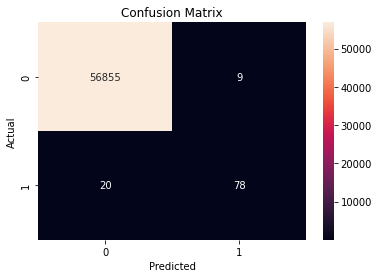

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


- Top-Left Square (True Negatives, TN): This square represents the transactions that were correctly identified as non-fraudulent. In this case, there are 56,855 true negatives.
- Top-Right Square (False Positives, FP): This square shows the transactions that were incorrectly identified as fraudulent. Here, there are 9 false positives.
- Bottom-Left Square (False Negatives, FN): This square indicates the fraudulent transactions that were incorrectly identified as non-fraudulent. The matrix shows there are 20 false negatives.
- Bottom-Right Square (True Positives, TP): This square represents the transactions that were correctly identified as fraudulent. We have 78 true positives.

## Interpretation:
- True Negatives (TN): The model is very effective at identifying legitimate transactions, with a high number of true negatives.
- False Positives (FP): There are very few false positives, indicating that the model seldomly mistakes legitimate transactions for fraudulent ones. This is good as it suggests that the model won't unduly flag legitimate behavior as fraudulent, which could result in unnecessary inconvenience to customers.
- False Negatives (FN): There are 20 false negatives, which is critical in the context of fraud detection. This means that 20 fraudulent transactions were not caught by the model, representing a direct loss and a security risk.
- True Positives (TP): The model has successfully identified 78 fraudulent transactions, which is good, but this number should ideally be as high as possible to ensure effective fraud detection.

## Business Implications:
- Reliability: The model appears reliable in identifying non-fraudulent transactions, as indicated by the high number of true negatives and low false positives. This is important for customer satisfaction and trust.
- Security Concern: The presence of false negatives means that the model is not catching all fraudulent transactions. While the number is relatively low, each false negative could potentially represent a significant financial loss and risk to the institution, depending on the transaction's value.
- Model Sensitivity: To reduce the number of false negatives, you might consider adjusting the model's threshold for classifying a transaction as fraudulent or further refining the model (perhaps by gathering more data, trying different algorithms, or tuning hyperparameters).

In conclusion, the model is performing well in distinguishing between fraudulent and non-fraudulent transactions, with room for improvement in detecting fraud (reducing false negatives). The low number of false positives suggests that it will not greatly disrupt the customer experience with false alarms.

# Importance of Feature Selection:

### V1-V28 Analysis: 
Given that these features are principal components from a PCA, their specific meanings are obscured. However, examining their importance (e.g., via feature importance scores from the Random Forest model) can indicate which components are most relevant in detecting fraud.

### Insight: 
Identifying the most influential features can help focus monitoring efforts on specific aspects of transaction data that are most indicative of fraud, potentially reducing the need for extensive processing of all features.

In [16]:
# Getting feature importances
importances = best_rf.feature_importances_
feature_names = X.columns

# Creating a DataFrame to view the importances
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)


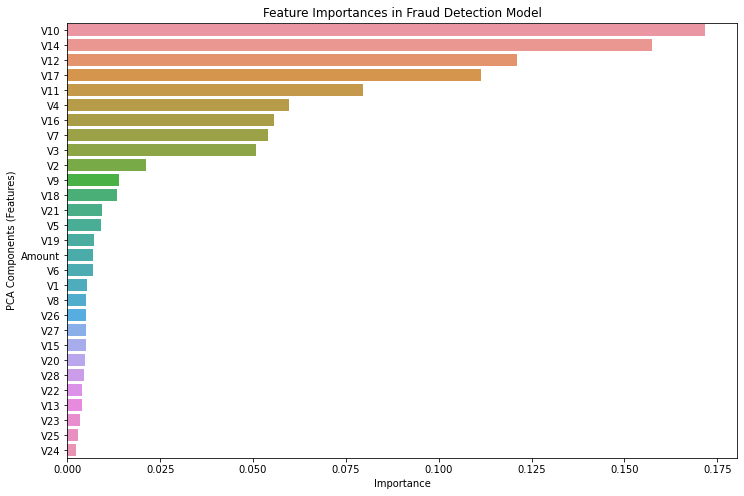

In [20]:
# Visualize Feature Importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances in Fraud Detection Model')
plt.xlabel('Importance')
plt.ylabel('PCA Components (Features)')
plt.show()


In [16]:
# Use the trained model to predict
new_predictions = best_rf.predict(X)

# Add the predictions back to the original DataFrame
df['Predicted_Class'] = new_predictions

# Filter to get only the fraudulent transactions
fraudulent_transactions = df[df['Predicted_Class'] == 1]

# Display fraudulent transactions
print(fraudulent_transactions)

              V1        V2        V3        V4        V5        V6        V7  \
541    -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545 -2.537387   
6108   -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536 -3.496197   
6331    0.008430  4.137837 -6.240697  6.675732  0.768307 -3.353060 -1.631735   
6334    0.026779  4.132464 -6.560600  6.348557  1.329666 -2.513479 -1.689102   
6336    0.329594  3.712889 -5.775935  6.078266  1.667359 -2.420168 -0.812891   
...          ...       ...       ...       ...       ...       ...       ...   
276864 -1.374424  2.793185 -4.346572  2.400731 -1.688433  0.111136 -0.922038   
279863 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494 -0.882850   
280143  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536 -1.413170   
280149 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346 -2.234739   
281144 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548 -2.208002   

              V8        V9       V10  .